
# Train-Test Splits and Cross-Validation

Training a machine learning model involves using data to learn patterns and make predictions. There is, however, a risk to training a model too well on some particular dataset, which is that the model may not generalize well to new, unseen data. To mitigate this risk, we use techniques like train-test splits and cross-validation.

## Train-Test Splits

A train-test split divides the dataset into two parts:

-   **Training Set**: Used to fit the model.
-   **Test Set**: Used to evaluate the model's performance on unseen data.

The split is usually done before any preprocessing of the data to avoid data leakage from the test set into the training set.

The split ratio can vary, but common practices include:

-   **80/20 Split**: 80% training, 20% testing.
-   **70/30 Split**: 70% training, 30% testing.
-   **90/10 Split**: 90% training, 10% testing.

This ensures that the model is trained on a substantial amount of data while still having enough data to evaluate its performance.

## Cross-Validation

Each machine learning model usually depends on a set of hyperparameters that need to be manually tuned to achieve the best performance. Cross-validation (CV) is a technique that helps to tune these hyperparameters and assess the model's performance more robustly.

Cross-validation involves splitting the training dataset into multiple subsets (folds) and training the model multiple times:

-   **$K$-Fold Cross-Validation**: The dataset is divided into $K$ subsets (folds). The model is trained $K$ times, each time using $K - 1$ folds for training and 1 fold for validation. The performance is averaged over all $K$ iterations.
-   **Leave-One-Out Cross-Validation (LOOCV)**: A special case of $K$-fold where $K$ is equal to the number of samples in the dataset. Each sample is used once as a validation set while the rest are used for training. This is computationally expensive but can be useful for small datasets.
-   **Stratified Cross-Validation**: Ensures that each fold has the same proportion of classes as the entire dataset. This is particularly useful for imbalanced datasets.

## Practical Demonstration

We will demonstrate the use of train-test splits and cross-validation using the California housing dataset, which is a regression dataset available in the `sklearn.datasets` module.

We will go through the Machine Learning workflow steps, but skip some of the steps that are not relevant for this demonstration.

-   Loading the dataset

In [1]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)
df = data.frame

-   Data exploration

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


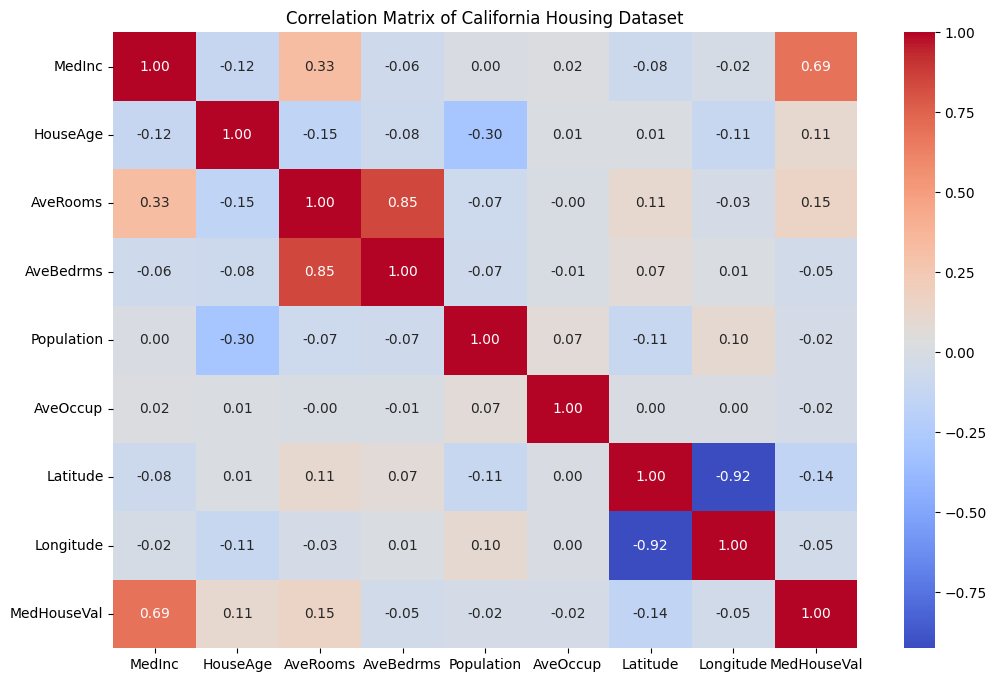

In [2]:
import pandas as pd

# Display the first few rows of the dataset
print(df.head())

# Plot the correlation matrix of the features and the target variable
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

Since the only meaningful correlation with the target variable (house value) is with the `MedInc` (median income) feature, we will keep only this feature for our demonstration.

In [3]:
# Select only the 'MedInc' feature for simplicity
X = df[['MedInc']]
y = df['MedHouseVal']
print(X.head())
print(y.head())

   MedInc
0  8.3252
1  8.3014
2  7.2574
3  5.6431
4  3.8462
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


-   Train-test split

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score

# Simple train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the dataset into training and testing sets, with 20% of the data reserved for testing. The `random_state` parameter ensures that the split is reproducible.

Let's now visualize the distribution of the target variable in the training and test sets.

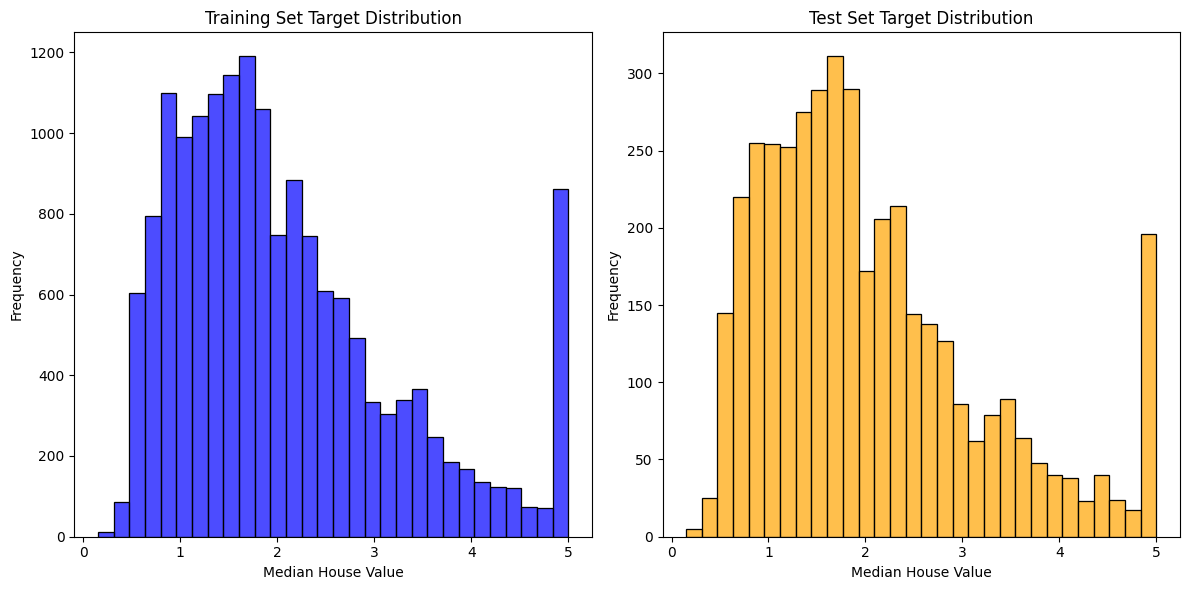

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=30, color='blue', alpha=0.7, label='Train Set')
plt.title('Training Set Target Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=30, color='orange', alpha=0.7, label='Test Set')
plt.title('Test Set Target Distribution')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

This visualization shows the distribution of house values in both the training and test sets, indicating that the split has preserved the overall distribution of the target variable.

-   Model training and evaluation:

We begin by training a simple linear regression model on the reduced training set and then evaluating its performance on the test set using the $R^2$ metric, which indicates how well the model explains the variance in the target variable.

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)
score_test = model.score(X_test, y_test)
print(f"Test set R²: {score_test:.2f}")

Test set R²: 0.46


We can try and improve the model evaluation by using cross-validation, which will give us a better estimate of the model's performance by averaging the results over multiple train-test splits.

In [7]:
# Cross-validation
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"Cross-validation R² scores: {cv_scores}")
print(f"CV R²: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}")

Cross-validation R² scores: [0.46458389 0.35374043 0.46252448 0.29716971 0.52896687]
CV R²: 0.42 +/- 0.08


This code performs 5-fold cross-validation on the entire dataset, providing a more robust estimate of the model's performance. The `cross_val_score` function automatically handles the train-test splits internally, allowing us to focus on the model evaluation.

We can use the `cross_val_predict` function to get the predicted values for each fold, which can be useful for further analysis or visualization.

In [8]:
from sklearn.model_selection import cross_val_predict

# Get cross-validated predictions
y_pred = cross_val_predict(model, X_train, y_train, cv=5)
print(f"Cross-validated predictions: {y_pred[:10]}")

Cross-validated predictions: [1.80873431 2.03897928 2.18214843 1.26025238 1.93141503 3.20923508
 1.50040842 3.77828872 1.07598144 3.12757286]


There was no real improvement in the model's performance, but this is expected since we are using a very simple model with only one feature. In practice, cross-validation is particularly useful when dealing with more complex models and larger datasets, as it helps to ensure that the model generalizes well to unseen data.

## Hands-on Exercises

Using the Ames Housing dataset:

-   Load the dataset

In [9]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='house_prices', as_frame=True)

-   Explore the dataset and select a few relevant features (e.g., `GrLivArea`, `OverallQual`, `YearBuilt`, `TotalBsmtSF`).

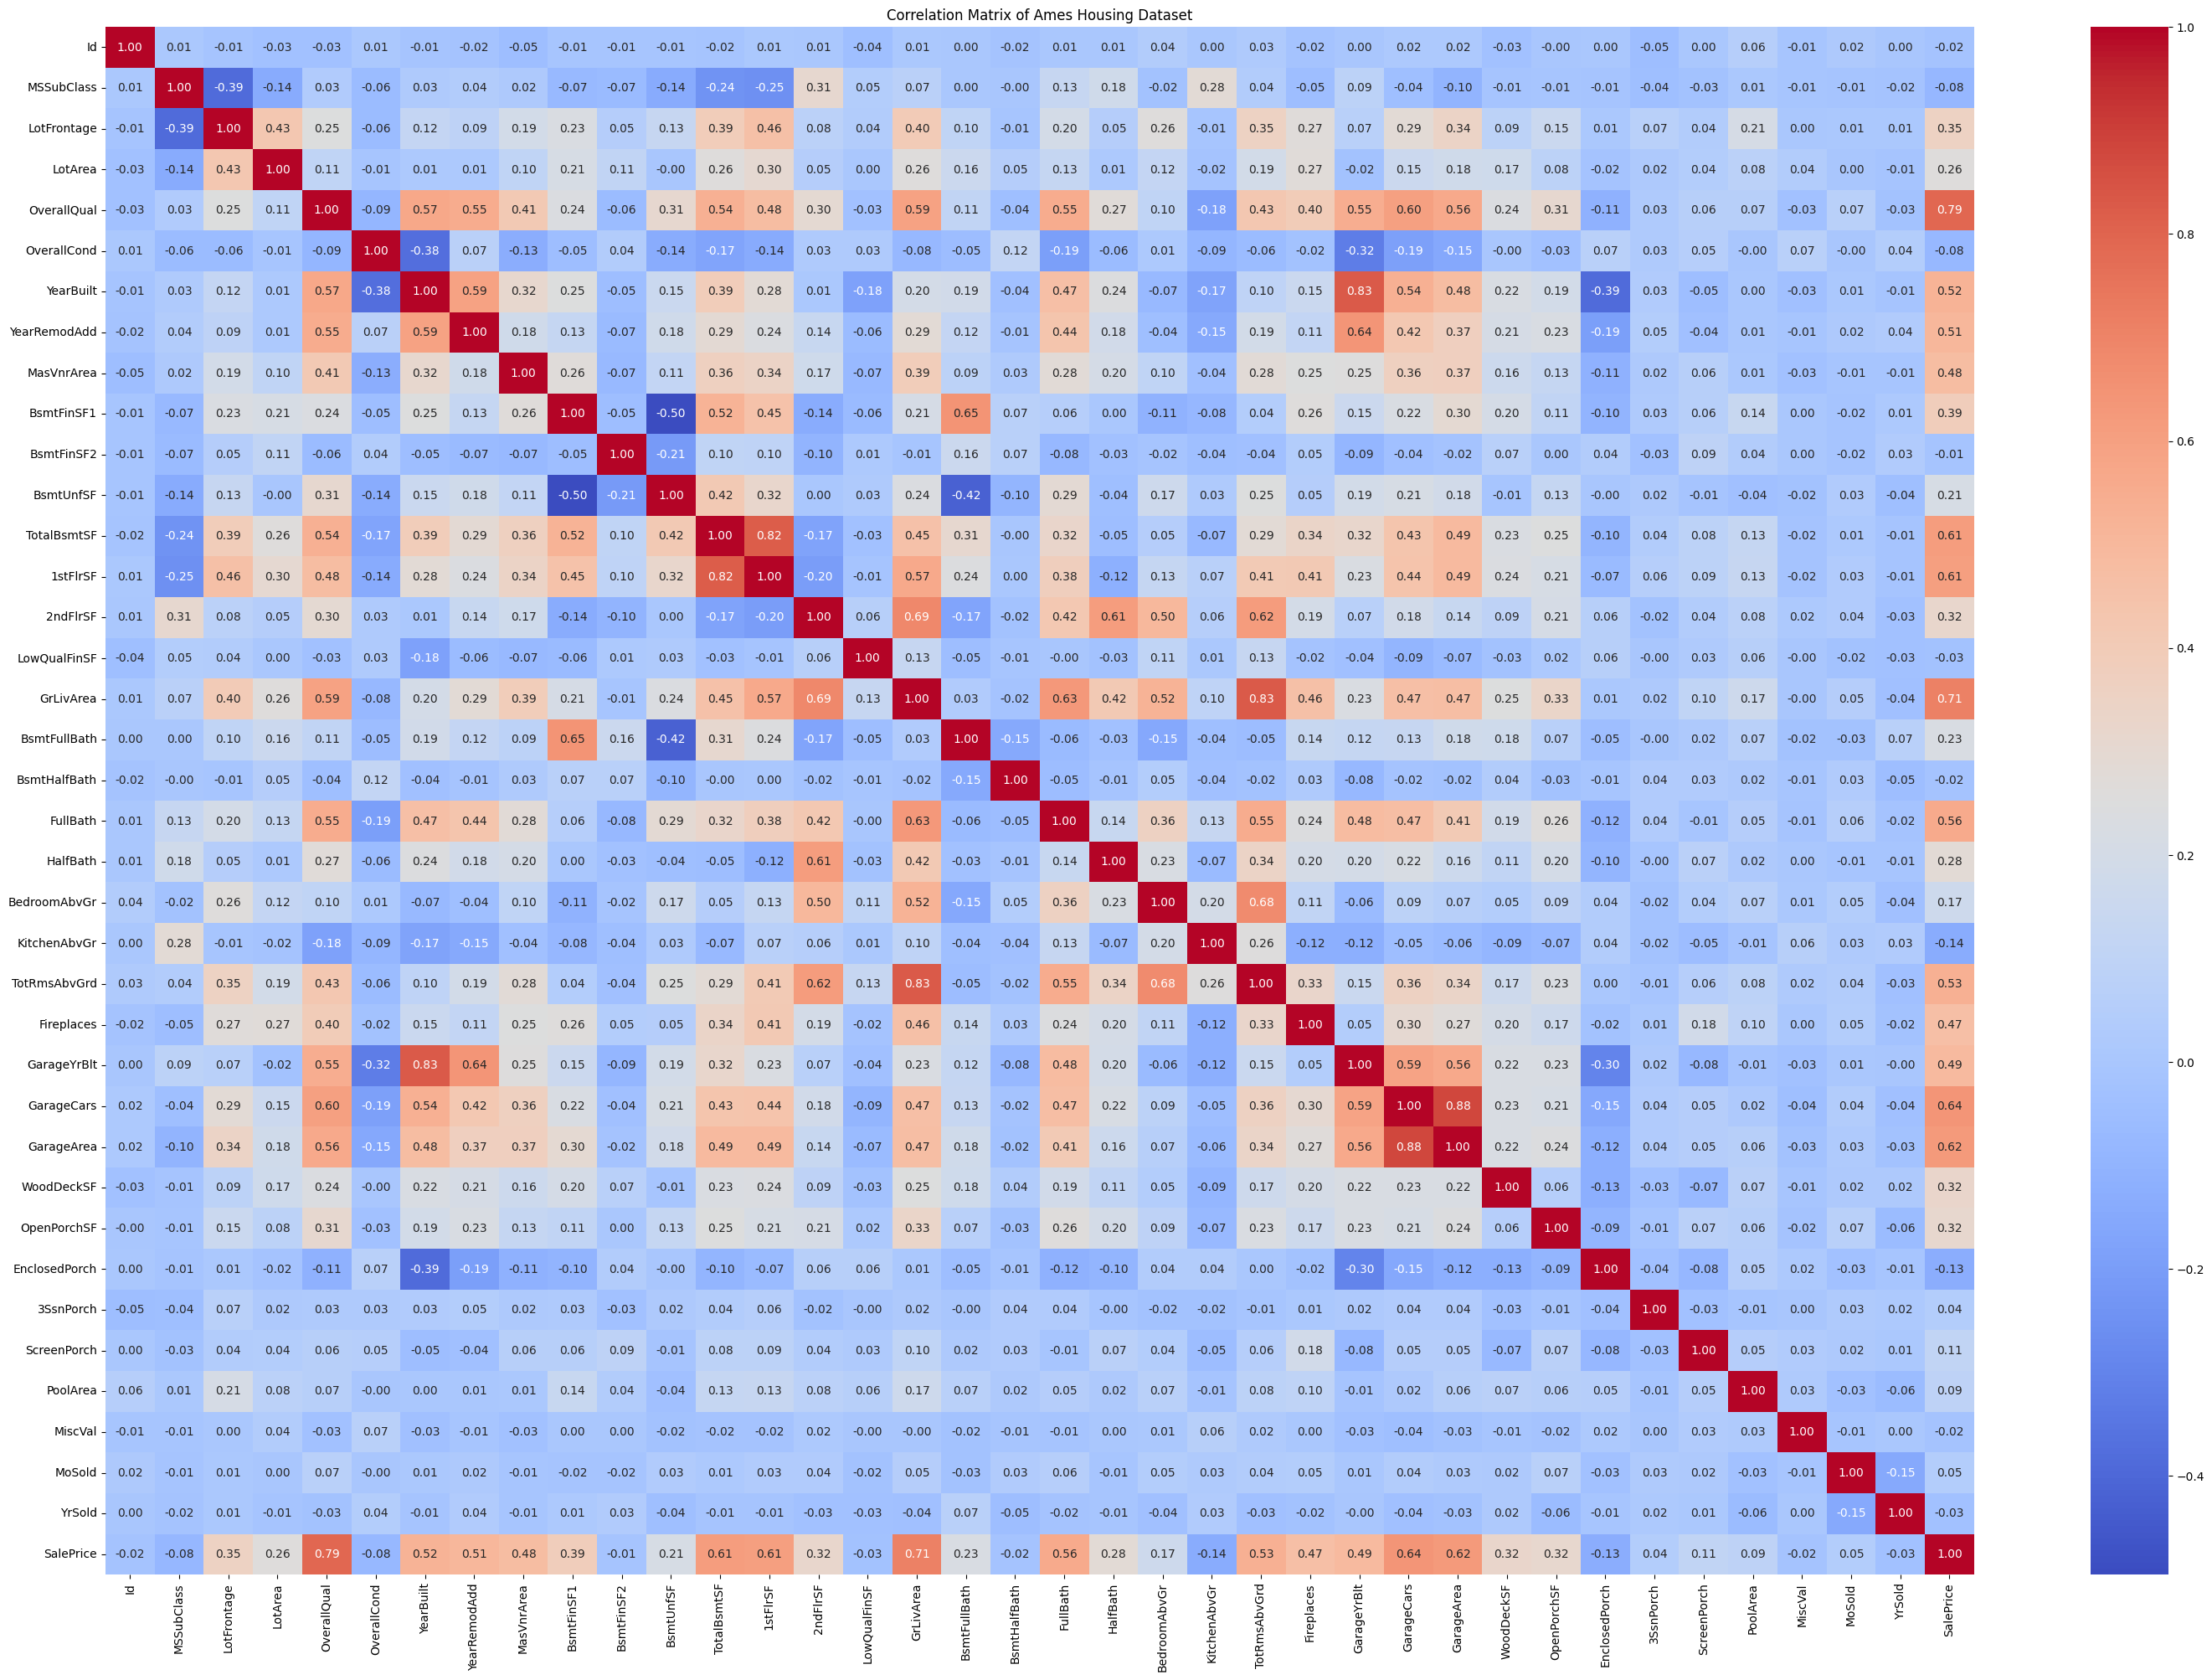

In [10]:
# Retain only numerical features for simplicity
data.frame = data.frame.select_dtypes(include=['number'])

# Plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(36, 24))
sns.heatmap(data.frame.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Ames Housing Dataset')
plt.show()

In [11]:
# Select relevant features
X = data.data[['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF']]
y = data.frame[data.target.name]
print(X.head())
print(y.head())

   GrLivArea  OverallQual  YearBuilt  TotalBsmtSF
0       1710            7       2003          856
1       1262            6       1976         1262
2       1786            7       2001          920
3       1717            7       1915          756
4       2198            8       2000         1145
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


-   Do a standard 80/20 train-test split.

In [12]:
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Train set size: 1168, Test set size: 292


-   Train a `LinearRegression` model and compute $R^2$ on the test set.

In [13]:
from sklearn.linear_model import LinearRegression

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on the test set
score_test = model.score(X_test, y_test)
print(f"Ames Test set R²: {score_test:.2f}")

Ames Test set R²: 0.79


-   Use 5-fold cross-validation (`cross_val_score`) on the entire dataset and compare the average $R^2$.

In [14]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring="r2")
print(f"Ames Cross-validation R² scores: {cv_scores}")
print(f"CV R²: {np.mean(cv_scores):.2f} +/- {np.std(cv_scores):.2f}")

Ames Cross-validation R² scores: [0.80148355 0.77468437 0.77212679 0.77194906 0.62676943]
CV R²: 0.75 +/- 0.06


-   Optional: Try changing the `cv` value (e.g., 10) and see how scores vary.

In [15]:
# Change the number of folds in cross-validation
cv_scores_10 = cross_val_score(model, X, y, cv=10, scoring="r2")
print(f"Ames Cross-validation R² scores with 10 folds: {cv_scores_10}")
print(f"CV R² with 10 folds: {np.mean(cv_scores_10):.2f} +/- {np.std(cv_scores_10):.2f}")

Ames Cross-validation R² scores with 10 folds: [0.80286191 0.79327    0.85007737 0.70204391 0.78052723 0.77653697
 0.77356133 0.77244003 0.50186064 0.81342654]
CV R² with 10 folds: 0.76 +/- 0.09


## Summary

In this section, we learned about the importance of train-test splits and cross-validation in machine learning. We demonstrated how to perform a train-test split, train a model, and evaluate its performance using the California housing dataset. We also explored the use of cross-validation to obtain a more robust estimate of model performance.